In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pymysql
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('data/Telco_Customer_Churn_Dataset .csv')
sample = df.sample(10)
sample.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2578,0354-WYROK,Female,1,Yes,Yes,31,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.90,2911.3,Yes
1467,8970-ANWXO,Female,0,No,No,23,Yes,Yes,DSL,No,...,No,Yes,Yes,Yes,One year,Yes,Mailed check,73.75,1756.6,No
2603,0164-APGRB,Female,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,114.90,8496.7,No
2229,3496-LFSZU,Male,0,Yes,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,70.50,294.2,No
2221,8619-IJNDK,Female,0,Yes,Yes,71,Yes,No,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Credit card (automatic),64.05,4492.9,No


In [2]:
df.shape

(7043, 21)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**-->EDA**

In [31]:
print("\nMissing values:\n", df.isnull().sum())

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='ignore')

print("TotalCharges is Successfully convered from object to int")


Missing values:
 gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
HighCharges                               0
SeniorHighCharges                         0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_Yes                        0
OnlineBackup_Yes                          0
DeviceProtection_Yes                      0
TechSupport_Yes                           0
StreamingTV_Yes                           0
StreamingMovies_Yes                       0
Contract_One year                         0
Contract_Two y


Churn Rate:
 Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


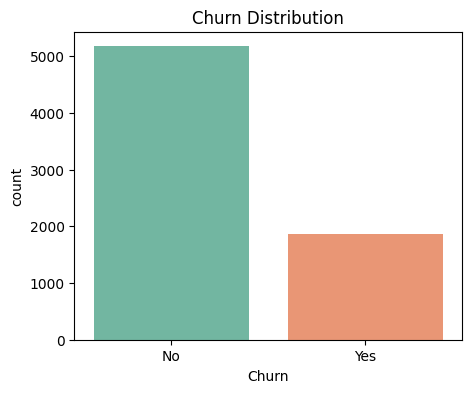

In [5]:
# ------------------------
# 2. Churn Rate
# ------------------------
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("\nChurn Rate:\n", churn_rate)

plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title("Churn Distribution")
plt.show()

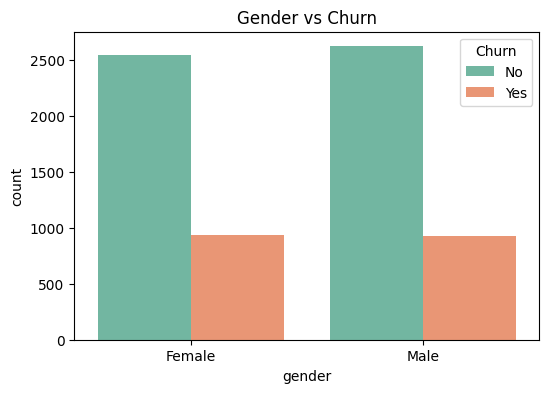

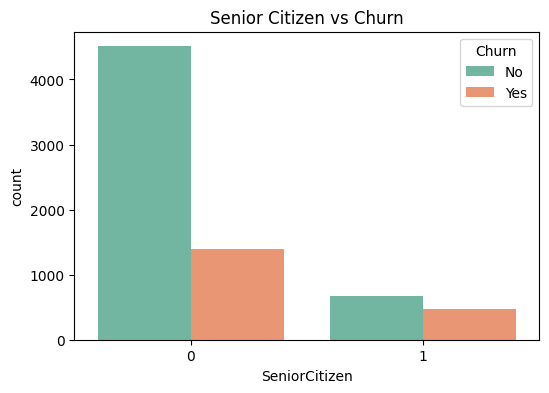

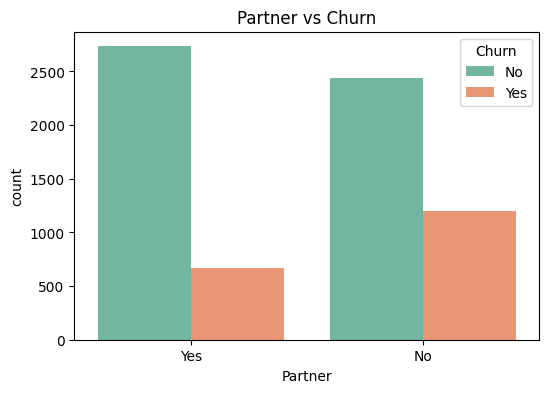

In [6]:
# ------------------------
# 3. Demographics
# ------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='Churn', data=df, palette='Set2')
plt.title("Gender vs Churn")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette='Set2')
plt.title("Senior Citizen vs Churn")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Partner', hue='Churn', data=df, palette='Set2')
plt.title("Partner vs Churn")
plt.show()

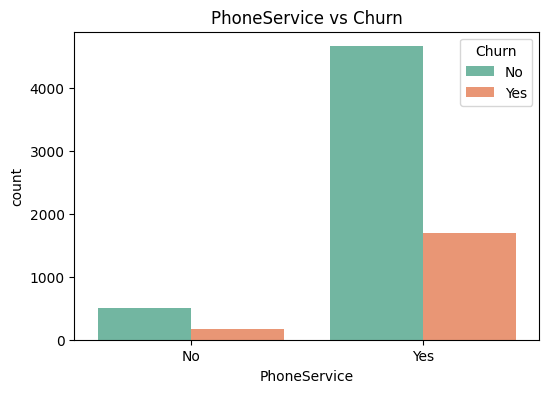

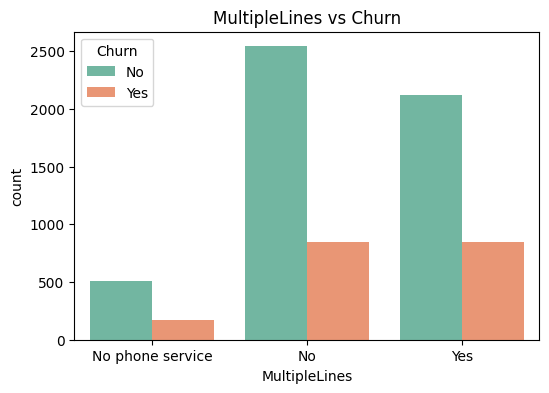

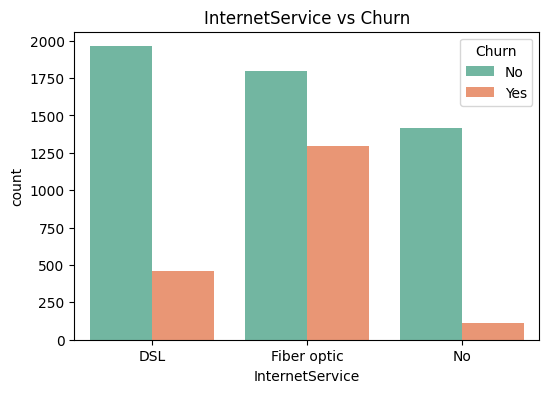

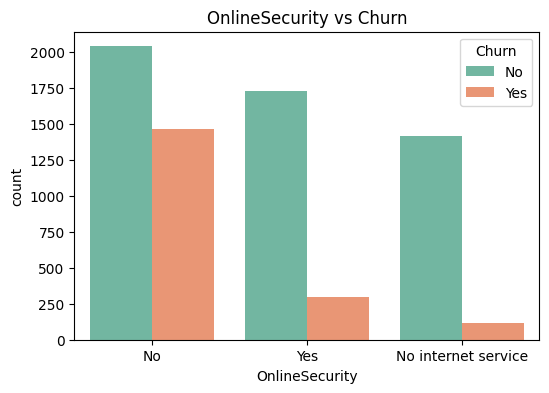

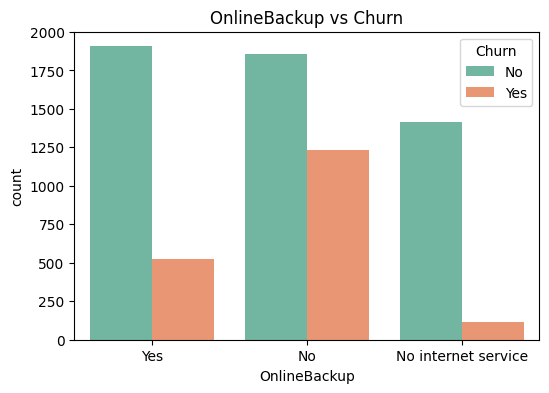

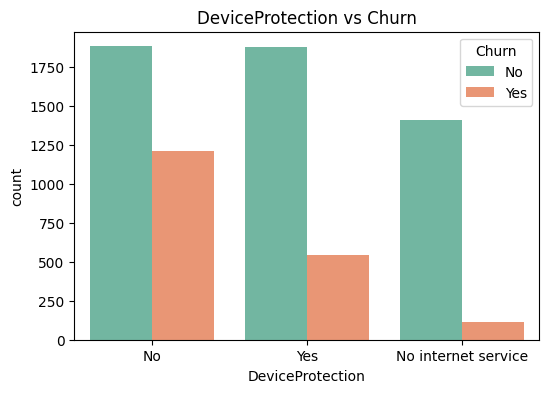

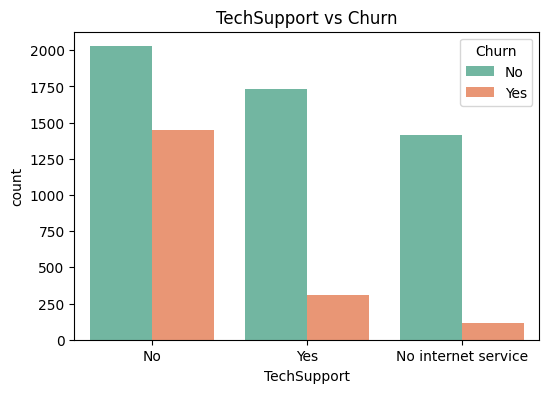

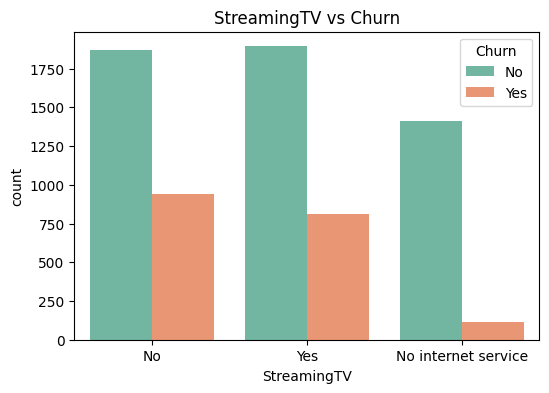

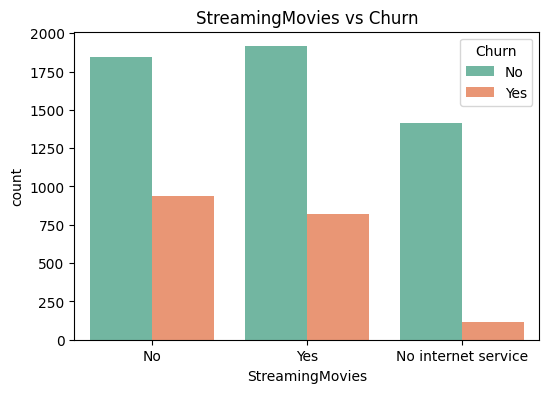

In [7]:
# ------------------------
# 4. Service Usage
# ------------------------
service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in service_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Churn', data=df, palette='Set2')
    plt.title(f"{col} vs Churn")
    plt.show()

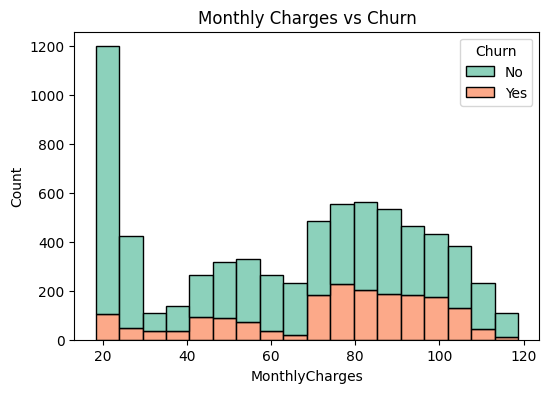

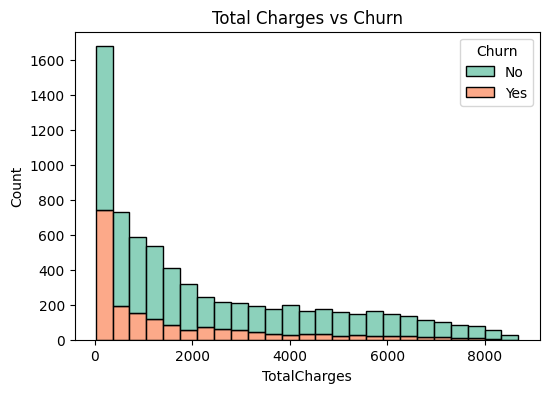

In [8]:
# ------------------------
# 5. Financial Behavior
# ------------------------
plt.figure(figsize=(6,4))
sns.histplot(df, x='MonthlyCharges', hue='Churn', multiple='stack', palette='Set2')
plt.title("Monthly Charges vs Churn")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df, x='TotalCharges', hue='Churn', multiple='stack', palette='Set2')
plt.title("Total Charges vs Churn")
plt.show()

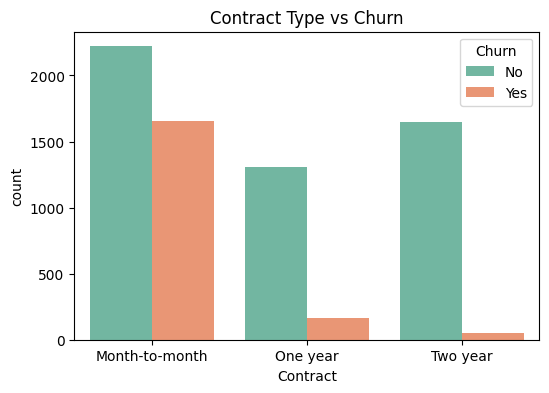

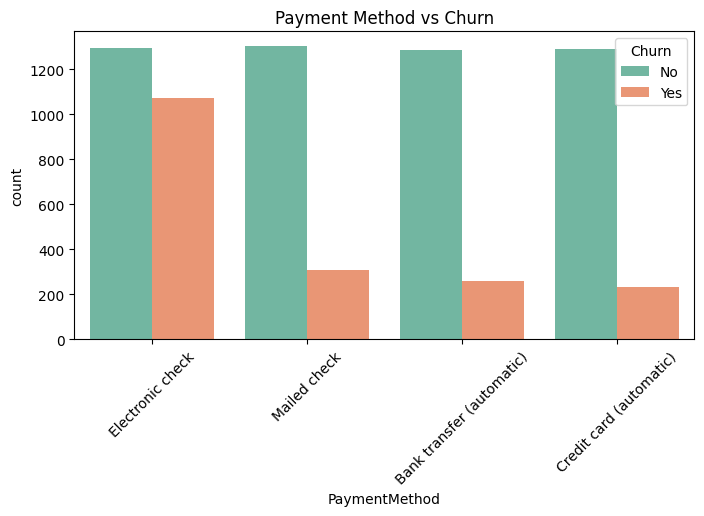

In [9]:
# ------------------------
# 6. Contract & Payment Method
# ------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2')
plt.title("Contract Type vs Churn")
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='Set2')
plt.title("Payment Method vs Churn")
plt.xticks(rotation=45)
plt.show()

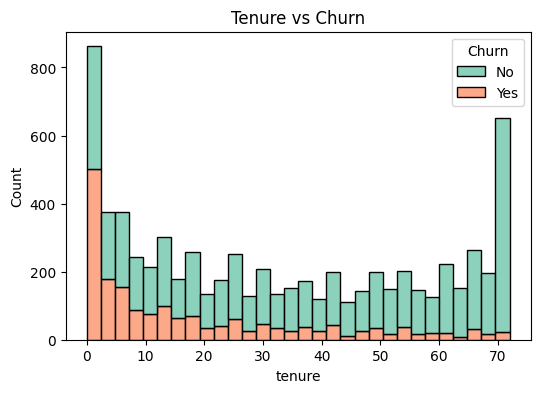

In [10]:
# ------------------------
# 7. Tenure Analysis
# ------------------------
plt.figure(figsize=(6,4))
sns.histplot(df, x='tenure', hue='Churn', multiple='stack', palette='Set2', bins=30)
plt.title("Tenure vs Churn")
plt.show()


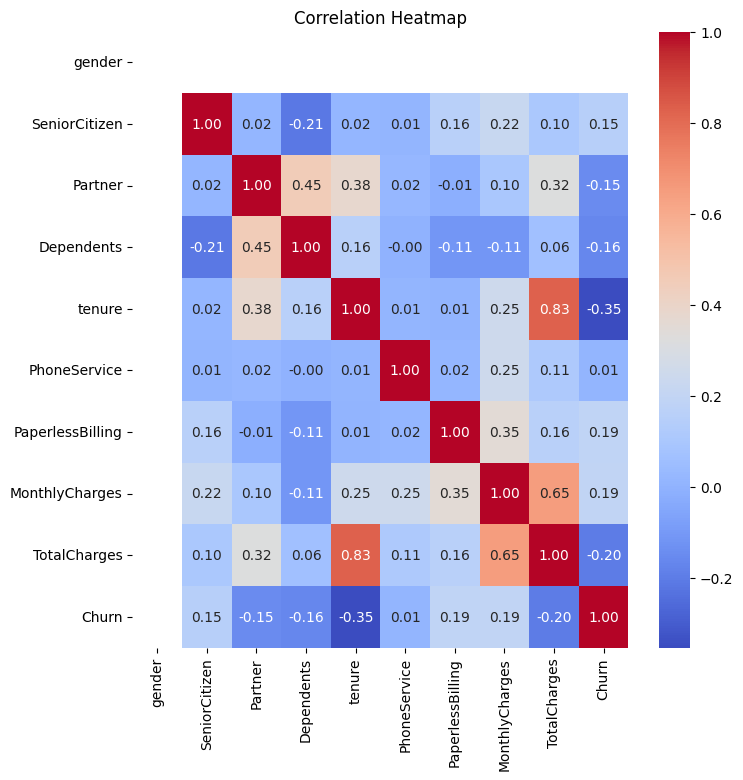

In [11]:
# ------------------------
# 8. Correlation Heatmap
# ------------------------
# Encode Yes/No binary columns
df_corr = df.copy()
for col in df_corr.columns:
    if df_corr[col].dtype == 'object':
        if df_corr[col].nunique() == 2:
            df_corr[col] = df_corr[col].map({'Yes': 1, 'No': 0})

# Keep only numeric columns for correlation
df_corr_numeric = df_corr.select_dtypes(include=['number'])

plt.figure(figsize=(8,8))
sns.heatmap(df_corr_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


**-->FETURE ENGINEERING AND ENCODING**

In [12]:
# Drop customerID (not useful for modeling)
df.drop('customerID', axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Feature Engineering based on EDA insights
# Tenure groups
df['TenureGroup'] = pd.cut(
    df['tenure'], 
    bins=[0, 12, 24, 48, 72], 
    labels=['0-1yr', '1-2yr', '2-4yr', '4-6yr']
)

# High monthly charges flag
df['HighCharges'] = (df['MonthlyCharges'] > df['MonthlyCharges'].median()).astype(int)

# Senior + High charges combo flag
df['SeniorHighCharges'] = ((df['SeniorCitizen'] == 1) & (df['HighCharges'] == 1)).astype(int)

# Encoding
# Label Encode binary columns
binary_cols = ['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# Map service features with "No internet service" → "No"
service_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in service_cols:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

# One-Hot Encode remaining categorical columns
multi_cols = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
              'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
              'Contract','PaymentMethod','TenureGroup']
df = pd.get_dummies(df, columns=multi_cols, drop_first=True)

#  Scale numeric features (important for logistic regression, optional for trees)
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols] = scaler.fit_transform(df[num_cols])

#  Final check
print("Final shape:", df.shape)
df.head()


Final shape: (7043, 29)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_1-2yr,TenureGroup_2-4yr,TenureGroup_4-6yr
0,0,0,1,0,-1.277445,0,1,-1.160323,-0.994194,0,...,False,False,False,False,False,True,False,False,False,False
1,1,0,0,0,0.066327,1,0,-0.259629,-0.173740,0,...,False,False,True,False,False,False,True,False,True,False
2,1,0,0,0,-1.236724,1,1,-0.362660,-0.959649,1,...,False,False,False,False,False,False,True,False,False,False
3,1,0,0,0,0.514251,0,0,-0.746535,-0.195248,0,...,False,False,True,False,False,False,False,False,True,False
4,0,0,0,0,-1.236724,1,1,0.197365,-0.940457,1,...,False,False,False,False,False,True,False,False,False,False


In [14]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_1-2yr,TenureGroup_2-4yr,TenureGroup_4-6yr
0,0,0,1,0,-1.277445,0,1,-1.160323,-0.994194,0,...,False,False,False,False,False,True,False,False,False,False
1,1,0,0,0,0.066327,1,0,-0.259629,-0.173740,0,...,False,False,True,False,False,False,True,False,True,False
2,1,0,0,0,-1.236724,1,1,-0.362660,-0.959649,1,...,False,False,False,False,False,False,True,False,False,False


**-->Customer Segmentation**

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [16]:
# ------------ Helpers to make this robust ------------

# service columns we care about
SERVICE_BASE_COLS = [
    'PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
    'DeviceProtection','TechSupport','StreamingTV','StreamingMovies'
]

def build_services_count(df: pd.DataFrame) -> pd.Series:
    """
    Returns a Series: count of 'active' services per row.
    Works if df has raw 'Yes/No' columns OR one-hot columns like 'MultipleLines_Yes'
    OR binary 0/1 versions.
    """
    count = pd.Series(0, index=df.index, dtype='int64')

    # Normalize/replace strings if present
    for base in SERVICE_BASE_COLS:
        if base in df.columns:
            col = df[base]
            # object with Yes/No
            if col.dtype == 'O':
                val = (col.replace({'No internet service':'No', 'No phone service':'No'})
                         .map({'Yes':1,'No':0}))
                val = val.fillna(0).astype(int)
                count += val
            else:
                # numeric binary
                try:
                    count += (df[base] > 0).astype(int)
                except Exception:
                    pass
        else:
            # one-hot columns
            yes_col = [c for c in df.columns if c.startswith(base + '_') and c.endswith('_Yes')]
            if yes_col:
                count += df[yes_col[0]].astype(int)
    return count

def build_contract_months(df: pd.DataFrame) -> pd.Series:
    """
    Returns an int Series for contract duration in months:
    Month-to-month=1, One year=12, Two year=24.
    Works for raw 'Contract' or one-hot columns 'Contract_One year', 'Contract_Two year'.
    """
    if 'Contract' in df.columns and df['Contract'].dtype == 'O':
        return df['Contract'].map({'Month-to-month':1, 'One year':12, 'Two year':24}).fillna(1).astype(int)
    else:
        one_year = df[[c for c in df.columns if c == 'Contract_One year']].sum(axis=1)
        two_year = df[[c for c in df.columns if c == 'Contract_Two year']].sum(axis=1)
        # month-to-month is baseline if both are 0
        return (1 + 11*one_year + 23*two_year).astype(int)

def get_churn_flag(df: pd.DataFrame) -> pd.Series:
    """
    Returns a 0/1 churn flag if 'Churn' exists; otherwise returns None.
    Works if 'Churn' is 'Yes/No' or already numeric.
    """
    if 'Churn' not in df.columns:
        return None
    s = df['Churn']
    if s.dtype == 'O':
        return s.map({'No':0, 'Yes':1}).astype('Int64')
    else:
        # assume already 0/1
        return s.astype('Int64')


In [17]:
# Work on a safe copy
data_seg = df.copy()
data_seg.columns = data_seg.columns.str.strip()

# Ensure charges are numeric if still strings (no-op if already numeric)
if 'TotalCharges' in data_seg.columns and data_seg['TotalCharges'].dtype == 'O':
    data_seg['TotalCharges'] = pd.to_numeric(data_seg['TotalCharges'], errors='coerce')
    data_seg['TotalCharges'] = data_seg['TotalCharges'].fillna(data_seg['TotalCharges'].median())

# Build robust features
data_seg['ServicesCount']  = build_services_count(data_seg)
data_seg['ContractMonths'] = build_contract_months(data_seg)

# Monetary + Recency (proxy by tenure)
seg_features = []
for c in ['tenure', 'ServicesCount', 'MonthlyCharges', 'TotalCharges', 'ContractMonths']:
    if c in data_seg.columns:
        seg_features.append(c)

# Safety check
print("Segmentation features:", seg_features)
assert len(seg_features) >= 3, "Not enough features found for segmentation. Check your df columns."

# # Standardize features for KMeans
# scaler_seg = StandardScaler()
# X_seg = scaler_seg.fit_transform(data_seg[seg_features])

# Handle NaNs in segmentation features — fill with median
for c in seg_features:
    if data_seg[c].isna().sum() > 0:
        data_seg[c] = data_seg[c].fillna(data_seg[c].median())

# Standardize features for KMeans
scaler_seg = StandardScaler()
X_seg = scaler_seg.fit_transform(data_seg[seg_features])

# Try multiple k's and pick the best by silhouette
k_range = range(3, 7)  # you can widen this range if you want
best_k, best_sil = None, -1
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = km.fit_predict(X_seg)
    sil = silhouette_score(X_seg, labels)
    print(f"k={k} → silhouette={sil:.3f}")
    if sil > best_sil:
        best_sil, best_k = sil, k

print(f"\nChosen k: {best_k} (silhouette={best_sil:.3f})")
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
data_seg['Segment'] = kmeans.fit_predict(X_seg)


Segmentation features: ['tenure', 'ServicesCount', 'MonthlyCharges', 'TotalCharges', 'ContractMonths']
k=3 → silhouette=0.405
k=4 → silhouette=0.371
k=5 → silhouette=0.354
k=6 → silhouette=0.326

Chosen k: 3 (silhouette=0.405)


In [18]:
# Cluster centers back to original scale
centers_scaled = kmeans.cluster_centers_
centers = pd.DataFrame(
    scaler_seg.inverse_transform(centers_scaled),
    columns=seg_features
)
centers['Segment'] = range(best_k)
print("[Segmentation] Cluster centers (original scale):")
display(centers.round(2))

# Churn rate by segment (if churn available)
churn_flag = get_churn_flag(df)
if churn_flag is not None:
    tmp = data_seg[['Segment']].copy()
    tmp['ChurnFlag'] = churn_flag.values
    seg_summary = (tmp.groupby('Segment')['ChurnFlag']
                     .agg(['count','mean'])
                     .rename(columns={'count':'customers','mean':'churn_rate'}))
    seg_summary['churn_rate'] = (seg_summary['churn_rate']*100).round(2)
    print("\n[Segmentation] Churn rate by segment (%):")
    display(seg_summary.sort_values('churn_rate', ascending=False))
else:
    print("\n[Segmentation] 'Churn' column not found. Skipping churn rate by segment.")

# Keep the segments for later use
segments_df = data_seg[['Segment']].copy()


[Segmentation] Cluster centers (original scale):


,tenure,ServicesCount,MonthlyCharges,TotalCharges,ContractMonths,Segment
0,0.42,1.62,-1.26,-0.49,19.02,0
1,-0.76,2.58,-0.08,-0.61,1.75,1
2,1.02,5.69,0.87,1.30,14.55,2



[Segmentation] Churn rate by segment (%):


,customers,churn_rate
Segment,,
1,3591,42.3
2,2172,14.83
0,1280,2.19


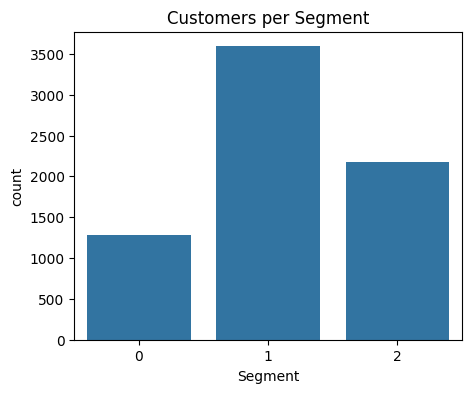

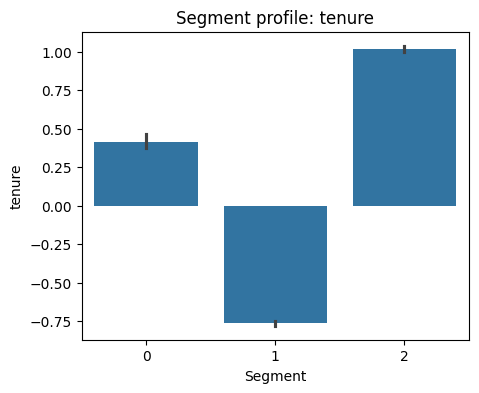

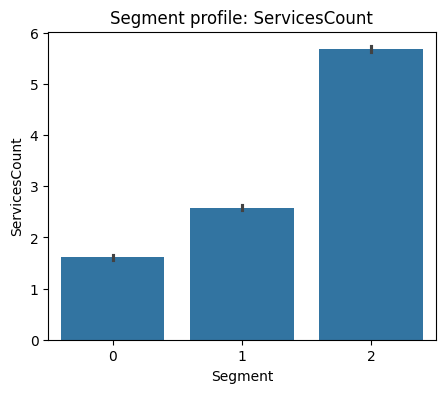

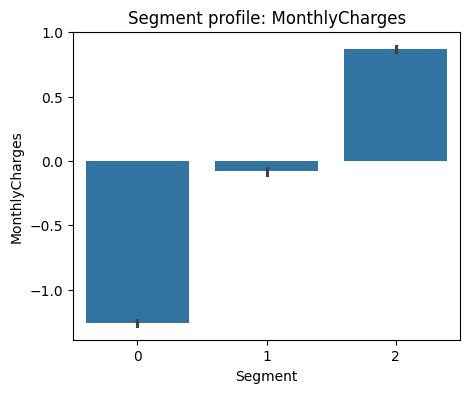

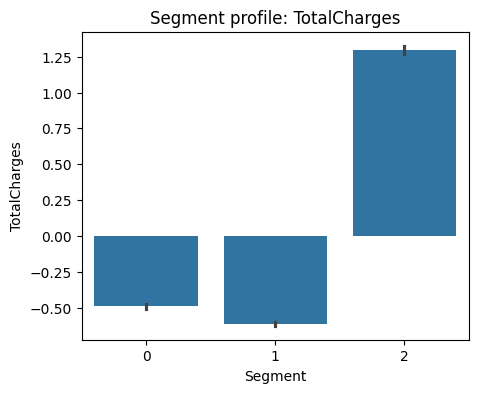

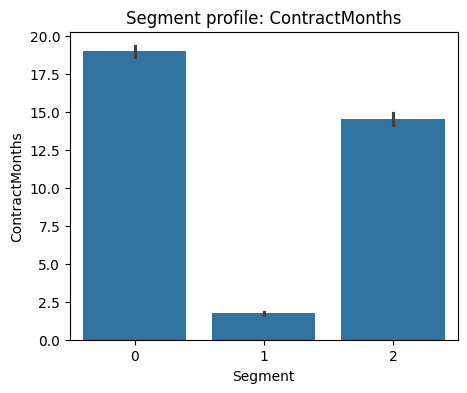

In [19]:
plt.figure(figsize=(5,4))
sns.countplot(x='Segment', data=data_seg)
plt.title("Customers per Segment")
plt.show()

# Plot segment centers for a couple of key features if they exist
for feat in [f for f in ['tenure','ServicesCount','MonthlyCharges','TotalCharges','ContractMonths'] if f in seg_features]:
    plt.figure(figsize=(5,4))
    sns.barplot(x='Segment', y=feat, data=data_seg)
    plt.title(f"Segment profile: {feat}")
    plt.show()


**-->ML MODELING**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

ml = df.copy()
ml.columns = ml.columns.str.strip()

# Target (handle Yes/No or numeric)
if 'Churn' in ml.columns:
    if ml['Churn'].dtype == 'O':
        y = ml['Churn'].map({'No':0,'Yes':1}).astype(int)
    else:
        y = ml['Churn'].astype(int)
    X = ml.drop(columns=['Churn'])
else:
    raise ValueError("Churn column not found in df. Ensure you didn't drop it before modeling.")

# Drop ID if present
for id_like in ['customerID','CustomerID','id','ID']:
    if id_like in X.columns:
        X = X.drop(columns=[id_like])

# Encode object columns:
# - If 2 unique values → map to 0/1
# - If >2 → one-hot (drop_first to keep it compact)
obj_cols = [c for c in X.columns if X[c].dtype == 'O']

# First binary maps
for c in obj_cols:
    uniq = X[c].dropna().unique()
    if len(uniq) == 2:
        # Try common maps
        mapper = None
        if set(uniq) <= set(['Yes','No']):
            mapper = {'No':0,'Yes':1}
        elif set(uniq) <= set(['Male','Female']):
            mapper = {'Female':0,'Male':1}
        if mapper is not None:
            X[c] = X[c].map(mapper)
# After mapping, re-check object cols
obj_cols = [c for c in X.columns if X[c].dtype == 'O']

# One-hot for remaining multi-class categoricals
if obj_cols:
    X = pd.get_dummies(X, columns=obj_cols, drop_first=True)

# Numeric columns to scale (only if they exist)
num_cols = [c for c in ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges'] if c in X.columns]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
if num_cols:
    X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
    X_test.loc[:,  num_cols] = scaler.transform(X_test[num_cols])

print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)


X_train shape: (5634, 28)
X_test shape : (1409, 28)


['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'HighCharges', 'SeniorHighCharges', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'TenureGroup_1-2yr', 'TenureGroup_2-4yr', 'TenureGroup_4-6yr']
[Logistic Regression] Metrics
Accuracy : 0.7345635202271115
ROC-AUC  : 0.8409
              precision    recall  f1-score   support

           0     0.9035    0.7150    0.7983      1035
           1     0.5000    0.7888    0.6120       374

    accuracy                         0.7346      1409
   macro avg     0.7018    0.7519    0.7052      1409
weighted avg     0.7964    0.7346    0.7488      1409



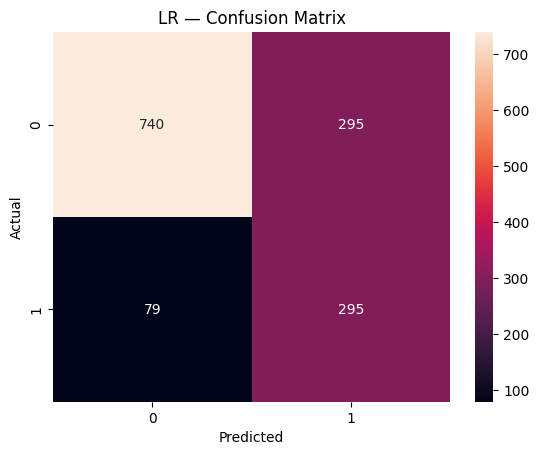


[LR] Top 10 negative features (reduce churn probability):


Contract_Two year    -1.524
tenure               -1.033
InternetService_No   -0.998
Contract_One year    -0.735
SeniorHighCharges    -0.406
TenureGroup_1-2yr    -0.395
OnlineSecurity_Yes   -0.339
PhoneService         -0.273
TechSupport_Yes      -0.270
MonthlyCharges       -0.233
dtype: float64


[LR] Top 10 positive features (increase churn probability):


PaymentMethod_Mailed check        0.054
SeniorCitizen                     0.168
TotalCharges                      0.183
TenureGroup_4-6yr                 0.319
StreamingTV_Yes                   0.346
MultipleLines_Yes                 0.346
PaperlessBilling                  0.348
StreamingMovies_Yes               0.378
PaymentMethod_Electronic check    0.401
InternetService_Fiber optic       1.126
dtype: float64

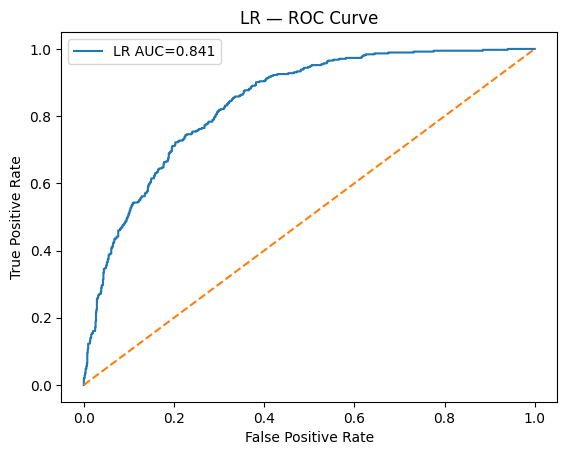

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score, roc_curve, accuracy_score

# ---------- Handle NaNs BEFORE scaling ----------
for c in X_train.columns:
    if X_train[c].isna().sum() > 0:
        if np.issubdtype(X_train[c].dtype, np.number):
            med = X_train[c].median()
            X_train[c] = X_train[c].fillna(med)
            X_test[c] = X_test[c].fillna(med)
        else:
            mode = X_train[c].mode()[0]
            X_train[c] = X_train[c].fillna(mode)
            X_test[c] = X_test[c].fillna(mode)

# ---------- Scale numeric features ----------
if num_cols:
    X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
    X_test.loc[:,  num_cols] = scaler.transform(X_test[num_cols])
# ---------- Save final column names for prediction ----------
training_columns = list(X_train.columns)
print(training_columns)  # <-- This will give you the columns your model expects

# ---------- Train Logistic Regression ----------
lr = LogisticRegression(max_iter=2000, class_weight='balanced', n_jobs=None)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
lr_prob = lr.predict_proba(X_test)[:,1]

print("[Logistic Regression] Metrics")
print("Accuracy :", accuracy_score(y_test, lr_pred))
print("ROC-AUC  :", roc_auc_score(y_test, lr_prob).round(4))
print(classification_report(y_test, lr_pred, digits=4))

# ---------- Confusion Matrix ----------
cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("LR — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---------- Feature coefficients ----------
coef_s = pd.Series(lr.coef_[0], index=X_train.columns).sort_values()
print("\n[LR] Top 10 negative features (reduce churn probability):")
display(coef_s.head(10).round(3))
print("\n[LR] Top 10 positive features (increase churn probability):")
display(coef_s.tail(10).round(3))

# ---------- ROC Curve ----------
fpr, tpr, thr = roc_curve(y_test, lr_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'LR AUC={roc_auc_score(y_test, lr_prob):.3f}')
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LR — ROC Curve")
plt.legend()
plt.show()


[Random Forest] Metrics
Accuracy : 0.8019872249822569
ROC-AUC  : 0.8463
              precision    recall  f1-score   support

           0     0.8298    0.9188    0.8721      1035
           1     0.6806    0.4786    0.5620       374

    accuracy                         0.8020      1409
   macro avg     0.7552    0.6987    0.7170      1409
weighted avg     0.7902    0.8020    0.7898      1409



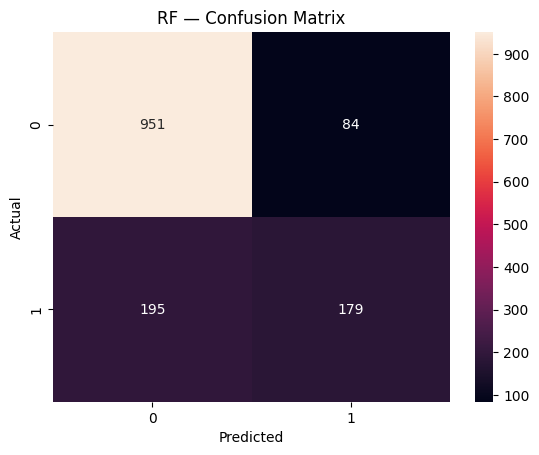


[RF] Top 15 feature importances:


tenure                            0.1794
TotalCharges                      0.1326
InternetService_Fiber optic       0.1190
MonthlyCharges                    0.0963
PaymentMethod_Electronic check    0.0807
Contract_Two year                 0.0696
TenureGroup_4-6yr                 0.0542
Contract_One year                 0.0343
InternetService_No                0.0340
HighCharges                       0.0272
OnlineSecurity_Yes                0.0265
TechSupport_Yes                   0.0201
PaperlessBilling                  0.0189
TenureGroup_2-4yr                 0.0119
OnlineBackup_Yes                  0.0114
dtype: float64

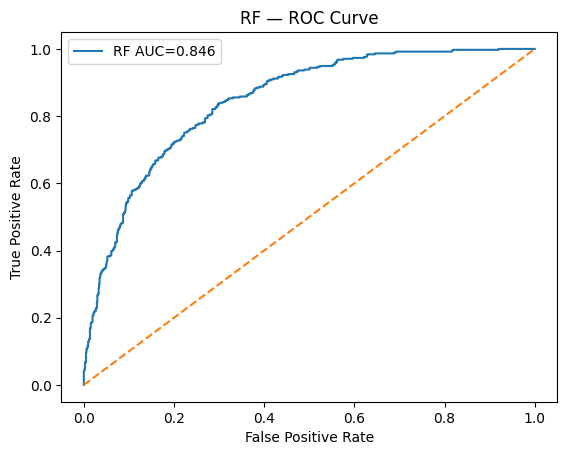

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
   n_estimators=100, random_state = 42,max_depth=7,
)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:,1]

print("[Random Forest] Metrics")
print("Accuracy :", accuracy_score(y_test, rf_pred))
print("ROC-AUC  :", roc_auc_score(y_test, rf_prob).round(4))
print(classification_report(y_test, rf_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("RF — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature importances
fi = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\n[RF] Top 15 feature importances:")
display(fi.head(15).round(4))

# ROC curve
fpr, tpr, thr = roc_curve(y_test, rf_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'RF AUC={roc_auc_score(y_test, rf_prob):.3f}')
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RF — ROC Curve")
plt.legend()
plt.show()


In [23]:
# segments_df was created earlier: it contains a 'Segment' column aligned to df's row order
if 'Segment' in segments_df.columns and len(segments_df) == len(df):
    df_with_segments = df.copy()
    df_with_segments['Segment'] = segments_df['Segment'].values

    # If churn present, show churn by segment again here
    churn_flag = get_churn_flag(df_with_segments)
    if churn_flag is not None:
        seg_rates = (df_with_segments.groupby('Segment')[churn_flag.name]
                                      .apply(lambda s: (s.map({'No':0,'Yes':1}) if s.dtype=='O' else s).mean()*100)
                                      .round(2))
        print("[Segments] Churn rate by Segment (%):")
        display(seg_rates.sort_values(ascending=False))
else:
    print("Segments not attached (row misalignment or missing). This step is optional.")


[Segments] Churn rate by Segment (%):


Segment
1    42.30
2    14.83
0     2.19
Name: Churn, dtype: float64

In [24]:
import pickle

# 1️⃣ Save segmentation results
df_with_segments = data_seg.copy()
df_with_segments.to_csv("df_with_segments.csv", index=False)
print("✅ Segmentation results saved as df_with_segments.csv")

# 2️⃣ Save trained models
with open("logistic_regression_model.pkl", "wb") as f:
    pickle.dump(lr, f)

with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(rf, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("scaler_seg.pkl", "wb") as f:
    pickle.dump(scaler_seg, f)

print("✅ Models & scalers saved")

# 3️⃣ Prediction function for new customers
def predict_churn(new_customer_df, model="logistic"):
    """
    Predict churn probability for new customers.
    model = 'logistic' or 'rf'
    """
    # Load models & scaler
    if model == "logistic":
        clf = pickle.load(open("logistic_regression_model.pkl", "rb"))
    elif model == "rf":
        clf = pickle.load(open("random_forest_model.pkl", "rb"))
    else:
        raise ValueError("Model must be 'logistic' or 'rf'")
    
    scaler_loaded = pickle.load(open("scaler.pkl", "rb"))
    
    # Preprocess new data (must match training columns exactly)
    for c in num_cols:
        if c in new_customer_df.columns:
            new_customer_df[c] = new_customer_df[c].fillna(X_train[c].median())
    new_customer_df[num_cols] = scaler_loaded.transform(new_customer_df[num_cols])

    # Predict
    churn_prob = clf.predict_proba(new_customer_df)[:,1]
    churn_flag = clf.predict(new_customer_df)
    
    return pd.DataFrame({
        "ChurnProbability": churn_prob,
        "ChurnPrediction": churn_flag
    })

print("✅ Prediction function created — use predict_churn() for new data")


✅ Segmentation results saved as df_with_segments.csv
✅ Models & scalers saved
✅ Prediction function created — use predict_churn() for new data


In [34]:
import pandas as pd
import pickle

# -------------------------------
# 1. Load trained Logistic Regression model
# -------------------------------
with open('logistic_regression_model.pkl', 'rb') as f:
    model = pickle.load(f)

# -------------------------------
# 2. Training columns (exact)
# -------------------------------
training_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 
    'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'HighCharges', 'SeniorHighCharges', 
    'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_Yes', 
    'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 
    'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 
    'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 
    'PaymentMethod_Mailed check', 'TenureGroup_1-2yr', 'TenureGroup_2-4yr', 'TenureGroup_4-6yr'
]

# -------------------------------
# 3. Preprocessing function for new user
# -------------------------------
def preprocess_new_user(new_user_dict, training_columns):
    df = pd.DataFrame([new_user_dict])
    
    # -------------------------------
    # Map categorical values to numeric (0/1)
    # -------------------------------
    mapping = {
        'gender': {'Male': 1, 'Female': 0},
        'Partner': {'Yes': 1, 'No': 0},
        'Dependents': {'Yes': 1, 'No': 0},
        'PhoneService': {'Yes': 1, 'No': 0},
        'PaperlessBilling': {'Yes': 1, 'No': 0},
        'MultipleLines': {'Yes': 1, 'No': 0, 'No phone service': 0},
        'InternetService': {'Fiber optic': 1, 'DSL': 0, 'No': 0},
        'OnlineSecurity': {'Yes': 1, 'No': 0, 'No internet service': 0},
        'OnlineBackup': {'Yes': 1, 'No': 0, 'No internet service': 0},
        'DeviceProtection': {'Yes': 1, 'No': 0, 'No internet service': 0},
        'TechSupport': {'Yes': 1, 'No': 0, 'No internet service': 0},
        'StreamingTV': {'Yes': 1, 'No': 0, 'No internet service': 0},
        'StreamingMovies': {'Yes': 1, 'No': 0, 'No internet service': 0},
        'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
        'PaymentMethod': {
            'Electronic check': 1,
            'Mailed check': 0,
            'Bank transfer (automatic)': 0,
            'Credit card (automatic)': 0
        },
        'HighCharges': {True: 1, False: 0},
        'SeniorHighCharges': {True: 1, False: 0},
        'TenureGroup': {'1-2yr': 0, '2-4yr': 1, '4-6yr': 2}
    }
    
    for col, map_dict in mapping.items():
        if col in df.columns:
            df[col] = df[col].map(map_dict)
    
    # -------------------------------
    # Rename columns to match training
    # -------------------------------
    rename_map = {
        'MultipleLines': 'MultipleLines_Yes',
        'InternetService': 'InternetService_Fiber optic',  # match your one-hot
        'OnlineSecurity': 'OnlineSecurity_Yes',
        'OnlineBackup': 'OnlineBackup_Yes',
        'DeviceProtection': 'DeviceProtection_Yes',
        'TechSupport': 'TechSupport_Yes',
        'StreamingTV': 'StreamingTV_Yes',
        'StreamingMovies': 'StreamingMovies_Yes',
        'Contract': 'Contract_One year',  # if multiple contract columns exist, adjust manually
        'PaymentMethod': 'PaymentMethod_Electronic check',
        'TenureGroup': 'TenureGroup_1-2yr'  # adjust if multiple columns exist
    }
    df.rename(columns=rename_map, inplace=True)
    
    # -------------------------------
    # Add missing columns
    # -------------------------------
    for col in training_columns:
        if col not in df.columns:
            df[col] = 0
    
    # Reorder columns
    df = df[training_columns]
    return df

# -------------------------------
# 4. Predict function
# -------------------------------
def predict_churn(new_user_dict):
    processed_user = preprocess_new_user(new_user_dict, training_columns)
    prediction = model.predict(processed_user)[0]
    probability = model.predict_proba(processed_user)[0][1]
    
    print(f"Predicted Churn: {'Yes' if prediction == 1 else 'No'}")
    print(f"Churn Probability: {probability:.2f}")
    return prediction, probability

# -------------------------------
# 5. Example new user
# -------------------------------
new_user = {
    'gender': 'Female',
    'SeniorCitizen': 1,
    'Partner': 'No',
    'Dependents': 'Yes',
    'tenure': 2,
    'PhoneService': 'Yes',
    'PaperlessBilling': 'Yes',
    'MonthlyCharges': 5.5,
    'TotalCharges': 10.0,
    'HighCharges': True,
    'SeniorHighCharges': True,
    'MultipleLines': 'No',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'No',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaymentMethod': 'Electronic check',
    'TenureGroup': '1-2yr'
}
new_user_no_churn = {
    'gender': 'Female',                    # Lower risk
    'SeniorCitizen': 1,                    # Not senior
    'Partner': 'No',                      # Has partner
    'Dependents': 'Yes',                   # Has dependents
    'tenure': 1,                          # Long tenure (5 years)
    'PhoneService': 'Yes',                 
    'PaperlessBilling': 'No',              
    'MonthlyCharges': 10.0,                # Low monthly charges
    'TotalCharges': 100.0,                # High total charges (loyalty)
    'HighCharges': False,                  
    'SeniorHighCharges': True,            
    'MultipleLines': 'Yes',                
    'InternetService': 'DSL',              
    'OnlineSecurity': 'No',               
    'OnlineBackup': 'No',                 
    'DeviceProtection': 'No',             
    'TechSupport': 'No',                  
    'StreamingTV': 'No',                  
    'StreamingMovies': 'No',              
    'Contract': 'One year',                # Long-term contract
    'PaymentMethod': 'Credit card (automatic)',
    'TenureGroup': '1-2yr'                 # Higher tenure group
}


# -------------------------------
# 6. Call prediction
# -------------------------------
predict_churn(new_user)
print("\n")
predict_churn(new_user_no_churn)


Predicted Churn: No
Churn Probability: 0.26


Predicted Churn: Yes
Churn Probability: 1.00


(np.int64(1), np.float64(0.9999980932678162))